In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('../Data/creditcard.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22114 entries, 0 to 22113
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    22114 non-null  int64  
 1   V1      22114 non-null  float64
 2   V2      22114 non-null  float64
 3   V3      22114 non-null  float64
 4   V4      22114 non-null  float64
 5   V5      22114 non-null  float64
 6   V6      22114 non-null  float64
 7   V7      22114 non-null  float64
 8   V8      22114 non-null  float64
 9   V9      22114 non-null  float64
 10  V10     22114 non-null  float64
 11  V11     22114 non-null  float64
 12  V12     22114 non-null  float64
 13  V13     22114 non-null  float64
 14  V14     22114 non-null  float64
 15  V15     22114 non-null  float64
 16  V16     22114 non-null  float64
 17  V17     22114 non-null  float64
 18  V18     22114 non-null  float64
 19  V19     22114 non-null  float64
 20  V20     22114 non-null  float64
 21  V21     22114 non-null  float64
 22

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Step 3: Class Distribution

Class
0    22028
1       86
Name: count, dtype: int64


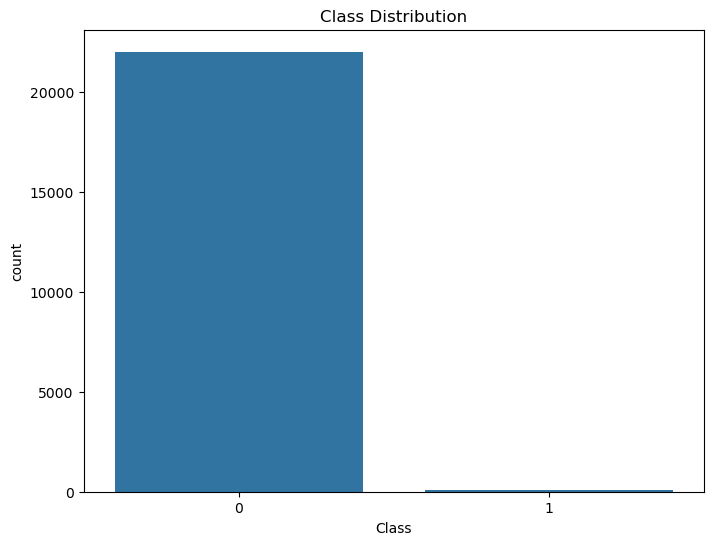

In [3]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


Step 4: Feature-Target Separation and Data Splitting    

Kami memisahkan fitur (X) dari target (y) dan membagi data menjadi set pelatihan dan pengujian:

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Scaling the Features    
Untuk meningkatkan kinerja model, kami menskalakan fitur menggunakan StandardScaler:

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 6: Training a Logistic Regression Model    

Kami membangun dan melatih model Regresi Logistik:

In [6]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

[[4404    2]
 [   3   14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4406
           1       0.88      0.82      0.85        17

    accuracy                           1.00      4423
   macro avg       0.94      0.91      0.92      4423
weighted avg       1.00      1.00      1.00      4423

Accuracy: 0.998869545557314
Precision: 0.875
Recall: 0.8235294117647058
F1-Score: 0.8484848484848485


Step 7: Outlier Detection with Isolation Forest and Local Outlier Factor    
Kami menerapkan dua algoritma deteksi anomali tanpa pengawasan —Isolation Forest dan Local Outlier Factor (LOF)— untuk mendeteksi penipuan:

In [7]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Evaluate both models
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if))

print("\nLocal Outlier Factor:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))

Isolation Forest:
[[21872   156]
 [   20    66]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22028
           1       0.30      0.77      0.43        86

    accuracy                           0.99     22114
   macro avg       0.65      0.88      0.71     22114
weighted avg       1.00      0.99      0.99     22114


Local Outlier Factor:
[[21808   220]
 [   84     2]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22028
           1       0.01      0.02      0.01        86

    accuracy                           0.99     22114
   macro avg       0.50      0.51      0.50     22114
weighted avg       0.99      0.99      0.99     22114



Step 8: Correlation Analysis    
Kami akan menghitung korelasi antara fitur dan memvisualisasikannya menggunakan peta panas:

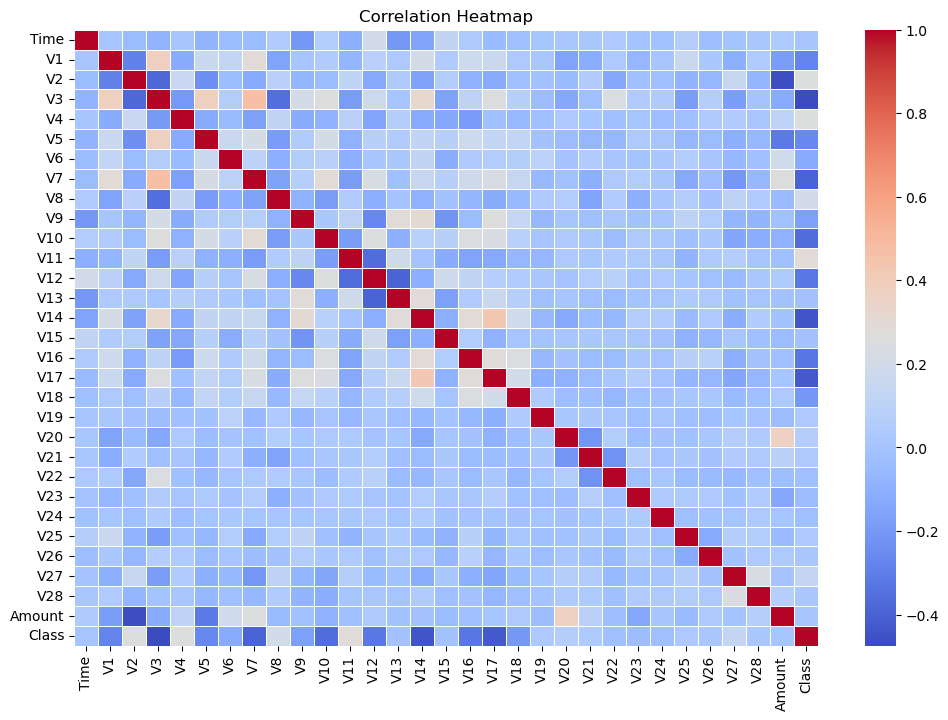

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Step 9: Visualizing Feature Distributions by Class  
Kami memvisualisasikan distribusi lima fitur pertama (V1 hingga V5) untuk kedua kelas (penipuan dan non-penipuan):

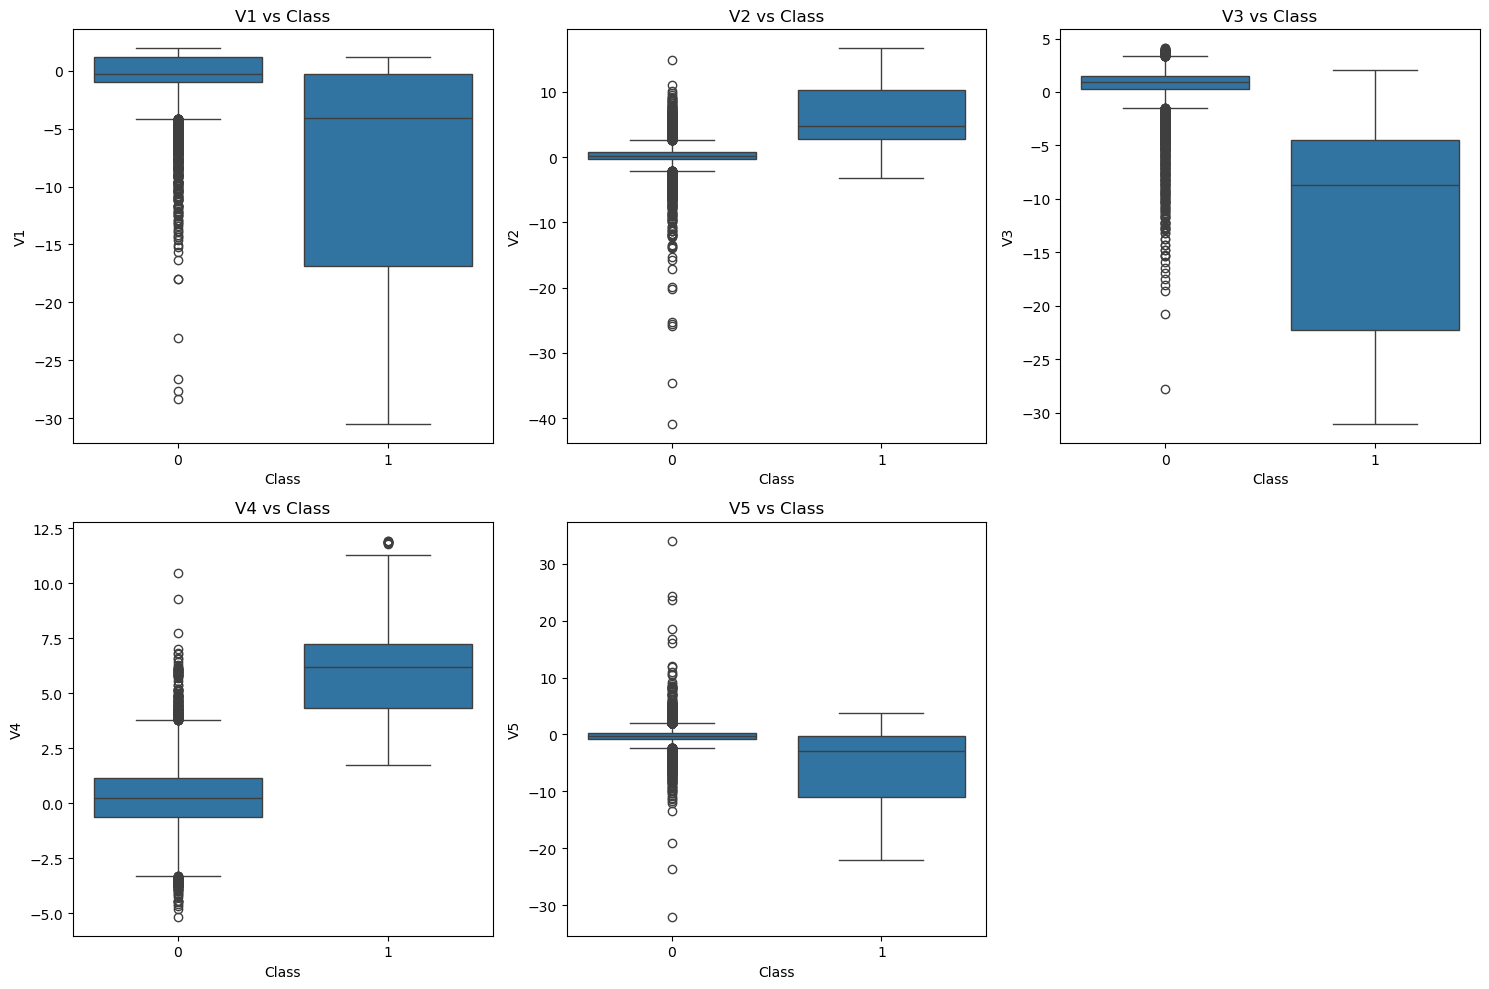

In [9]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

Step 10: Separate and Describe Fraudulent and Non-Fraudulent Transactions   
Kami memisahkan transaksi penipuan dan non-penipuan dan menampilkan statistik deskriptif untuk keduanya:

In [10]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print("Fraud Transactions:")
print(fraud.describe())

print("\nNon-Fraud Transactions:")
print(non_fraud.describe())

Fraud Transactions:
               Time         V1         V2         V3         V4         V5  \
count     86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   17592.162791  -8.792044   6.504115 -12.461366   6.302522  -6.112129   
std     8567.918886   9.932215   4.864585   9.876212   2.876991   7.394644   
min      406.000000 -30.552380  -3.157307 -31.103685   1.721680 -22.105532   
25%     8825.500000 -16.837767   2.727693 -22.233736   4.336171 -11.051981   
50%    17679.000000  -4.108510   4.703059  -8.728860   6.180023  -2.840711   
75%    26771.000000  -0.305935  10.324142  -4.469978   7.234383  -0.179455   
max    30852.000000   1.234235  16.713389   2.041003  11.927512   3.738853   

              V6         V7         V8         V9  ...        V21        V22  \
count  86.000000  86.000000  86.000000  86.000000  ...  86.000000  86.000000   
mean   -2.534417  -8.479521   4.438385  -3.005413  ...   0.536947  -0.386820   
std     1.632147   7.536839   6.62281

Step 11: Comparing Model Performance    
Terakhir, kami membandingkan kinerja semua model dalam hal akurasi, presisi, ingatan, dan skor F1:

In [11]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y, y_pred_if), accuracy_score(y, y_pred_lof)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y, y_pred_if), precision_score(y, y_pred_lof)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y, y_pred_if), recall_score(y, y_pred_lof)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y, y_pred_if), f1_score(y, y_pred_lof)]
})

print(results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.998870   0.875000  0.823529  0.848485
1      Isolation Forest  0.992041   0.297297  0.767442  0.428571
2  Local Outlier Factor  0.986253   0.009009  0.023256  0.012987
